In [499]:

import os
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt






In [500]:
dataset_path = 'C:/Users/MAKOS/Desktop/Machine_Learning/uganda_traffic_forecasting.csv'
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset not found at {dataset_path}")
data = pd.read_csv(dataset_path)

In [501]:
print(f"Dataset loaded with {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset loaded with 1538 rows and 11 columns.


In [502]:
data.head(30)

,timestamp,location_id,vehicle_count,avg_speed,weather,day_of_week,is_holiday,event,sensor_status,road_condition,target_congestion_level
0,2023-01-01 03:00:00,ENT002,23.0,40.72036861283745,Clear,Thursday,0.0,Parade,FAIL,Good,0.0
1,2023-01-01 03:15:00,GUL004,15.0,37.87791030098848,Rainy,Tuesday,0.0,Parade,FAIL,Poor,1.0
2,2023-01-01 03:30:00,GUL004,21.0,30.480815399777644,Clear,Saturday,1.0,Marathon,OK,Moderate,2.0
3,2023-01-01 03:45:00,MBR003,25.0,40.774805185188626,Rainy,Monday,0.0,NaN,UNKNOWN,???,0.0
4,2023-01-01 04:00:00,GUL004,15.0,42.57752540142751,Snowy,Friday,0.0,Marathon,OK,Moderate,1.0
5,2023-01-01 04:30:00,ENT002,19.0,43.341764172448976,Foggy,Wednesday,0.0,NaN,UNKNOWN,Good,3.0
6,2023-01-01 04:45:00,MBR003,21.0,38.44740951175251,Clear,Friday,1.0,Parade,OK,Poor,2.0
7,2023-01-01 05:00:00,KLA001,17.0,20.92192442122609,Rainy,Friday,0.0,Accident,FAIL,Moderate,4.0
8,2023-01-01 05:15:00,ENT002,19.0,31.39614989220498,Foggy,Thursday,0.0,Accident,FAIL,Moderate,2.0
9,2023-01-01 05:30:00,KLA001,16.0,35.863944665783556,Snowy,Saturday,1.0,Accident,FAIL,Good,4.0


In [503]:
data.sample(1000)


,timestamp,location_id,vehicle_count,avg_speed,weather,day_of_week,is_holiday,event,sensor_status,road_condition,target_congestion_level
577,2023-01-07 11:30:00,GUL004,21.0,60.49812095785926,Clear,Monday,1.0,Marathon,FAIL,Good,2.0
1279,2023-01-15 06:30:00,GUL004,21.0,19.637794971440634,Clear,Thursday,0.0,Marathon,FAIL,NaN,1.0
367,2023-01-05 04:30:00,KLA001,24.0,42.12574030632215,Snowy,Monday,1.0,NaN,UNKNOWN,Moderate,1.0
989,2023-01-12 02:30:00,MBR003,22.0,47.00700612120583,Clear,Saturday,1.0,Parade,FAIL,Poor,2.0
1363,2023-01-16 04:00:00,ENT002,18.0,51.73442276632445,Snowy,Tuesday,1.0,Parade,UNKNOWN,Good,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1125,2023-01-13 13:30:00,MBR003,21.0,63.490757867007574,Rainy,Saturday,0.0,Marathon,OK,Moderate,0.0
1419,2023-01-12 13:30:00,KLA001,22.0,29.013795748221877,Rainy,Friday,1.0,Parade,OK,Good,4.0
1507,2023-01-11 01:45:00,GUL004,20.0,44.281862478105765,Clear,Monday,0.0,NaN,OK,Poor,1.0
743,2023-01-09 09:15:00,GUL004,16.0,34.494480682915125,Foggy,Saturday,1.0,Marathon,OK,Moderate,0.0


In [504]:
buffer = io.StringIO()
data.info(buf=buffer, show_counts=True)
print(buffer.getvalue())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   timestamp                1537 non-null   object
 1   location_id              1534 non-null   object
 2   vehicle_count            1536 non-null   object
 3   avg_speed                1537 non-null   object
 4   weather                  1533 non-null   object
 5   day_of_week              1533 non-null   object
 6   is_holiday               1534 non-null   object
 7   event                    1155 non-null   object
 8   sensor_status            1538 non-null   object
 9   road_condition           1536 non-null   object
 10  target_congestion_level  1537 non-null   object
dtypes: object(11)
memory usage: 132.3+ KB



In [505]:
info_tbl = pd.DataFrame({
    "column": data.columns,
    "non‑null count": data.notna().sum(),
    "dtype": data.dtypes.astype(str)
    })

info_tbl = info_tbl.set_index("column")
info_tbl["non‑null count"] = info_tbl["non‑null count"].astype(int)
info_tbl = info_tbl.sort_values(by="non‑null count", ascending=False)

info_tbl = info_tbl.rename(columns={"column": "Column", "non‑null count": "Non-null Count", "dtype": "Data Type"})
print(info_tbl)
info_tbl = info_tbl.reset_index()

                         Non-null Count Data Type
column                                           
sensor_status                      1538    object
avg_speed                          1537    object
timestamp                          1537    object
target_congestion_level            1537    object
vehicle_count                      1536    object
road_condition                     1536    object
location_id                        1534    object
is_holiday                         1534    object
weather                            1533    object
day_of_week                        1533    object
event                              1155    object


In [506]:
data[data.duplicated()]

,timestamp,location_id,vehicle_count,avg_speed,weather,day_of_week,is_holiday,event,sensor_status,road_condition,target_congestion_level
1417,2023-01-07 22:45:00,MBR003,21.0,42.127397758576606,Foggy,Saturday,0.0,NaN,OK,Poor,3.0
1431,2023-01-07 17:15:00,ENT002,24.0,30.521072827310135,Clear,Monday,1.0,Accident,FAIL,Poor,1.0
1439,2023-01-07 05:45:00,MBR003,31.0,29.33765068100775,Clear,Saturday,0.0,Marathon,UNKNOWN,Good,3.0
1447,2023-01-08 10:15:00,MBR003,22.0,50.57368305378225,Snowy,Friday,0.0,NaN,UNKNOWN,Poor,1.0
1457,2023-01-05 03:00:00,GUL004,17.0,37.20189657622994,Foggy,Saturday,1.0,Marathon,FAIL,Good,4.0
...,...,...,...,...,...,...,...,...,...,...,...
1533,2023-01-01 15:45:00,MBR003,32.0,42.24216404290793,Rainy,Friday,1.0,Parade,FAIL,Good,3.0
1534,2023-01-07 17:30:00,ENT002,22.0,31.65676954508418,Clear,Monday,1.0,Parade,UNKNOWN,Poor,2.0
1535,2023-01-02 00:30:00,???,17.0,42.34024454353148,Snowy,Tuesday,0.0,Marathon,FAIL,Good,2.0
1536,2023-01-15 08:45:00,GUL004,19.0,46.80220360476691,Foggy,Saturday,1.0,NaN,OK,Moderate,4.0


In [507]:
data.drop_duplicates(inplace=True)
data[data.duplicated()]

,timestamp,location_id,vehicle_count,avg_speed,weather,day_of_week,is_holiday,event,sensor_status,road_condition,target_congestion_level


In [508]:
missing_value_placeholders = ['N/A', '???', '-', 'NULL', '']
# Replace these placeholders with numpy.nan
data = data.replace(missing_value_placeholders, np.nan)

categorical_cols= ['event','day_of_week','weather','road_condition']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
print("Categorical features one-hot encoded.")
data_encoded.head(10)


Categorical features one-hot encoded.


,timestamp,location_id,vehicle_count,avg_speed,is_holiday,sensor_status,target_congestion_level,event_Marathon,event_Parade,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,weather_Foggy,weather_Rainy,weather_Snowy,road_condition_Moderate,road_condition_Poor
0,2023-01-01 03:00:00,ENT002,23.0,40.72036861283745,0.0,FAIL,0.0,False,True,False,False,False,True,False,False,False,False,False,False,False
1,2023-01-01 03:15:00,GUL004,15.0,37.87791030098848,0.0,FAIL,1.0,False,True,False,False,False,False,True,False,False,True,False,False,True
2,2023-01-01 03:30:00,GUL004,21.0,30.480815399777644,1.0,OK,2.0,True,False,False,True,False,False,False,False,False,False,False,True,False
3,2023-01-01 03:45:00,MBR003,25.0,40.774805185188626,0.0,UNKNOWN,0.0,False,False,True,False,False,False,False,False,False,True,False,False,False
4,2023-01-01 04:00:00,GUL004,15.0,42.57752540142751,0.0,OK,1.0,True,False,False,False,False,False,False,False,False,False,True,True,False
5,2023-01-01 04:30:00,ENT002,19.0,43.341764172448976,0.0,UNKNOWN,3.0,False,False,False,False,False,False,False,True,True,False,False,False,False
6,2023-01-01 04:45:00,MBR003,21.0,38.44740951175251,1.0,OK,2.0,False,True,False,False,False,False,False,False,False,False,False,False,True
7,2023-01-01 05:00:00,KLA001,17.0,20.92192442122609,0.0,FAIL,4.0,False,False,False,False,False,False,False,False,False,True,False,True,False
8,2023-01-01 05:15:00,ENT002,19.0,31.39614989220498,0.0,FAIL,2.0,False,False,False,False,False,True,False,False,True,False,False,True,False
9,2023-01-01 05:30:00,KLA001,16.0,35.863944665783556,1.0,FAIL,4.0,False,False,False,True,False,False,False,False,False,False,True,False,False


In [509]:
numeric_cols=['target_congestion_level','vehicle_count','avg_speed','is_holiday']

for col in numeric_cols :
    if col in  data.columns:
        data[col]=pd.to_numeric(data[col],errors='coerce')
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')


In [510]:
data.isnull().sum()

timestamp                    5
location_id                  8
vehicle_count               10
avg_speed                    5
weather                      9
day_of_week                  5
is_holiday                  11
event                      376
sensor_status                4
road_condition               5
target_congestion_level      6
dtype: int64

In [511]:
print("column Name\tpercentage of missing values")
for col in data.columns:
    # Display percentage of missing values with 2 decimal places
    print(f"{data[col].name}           {data[col].isnull().sum() / data.shape[0] * 100:.2f}%")
    print(data[col].isnull().sum(), "missing values ")
data.dtypes

column Name	percentage of missing values
timestamp           0.34%
5 missing values 
location_id           0.55%
8 missing values 
vehicle_count           0.68%
10 missing values 
avg_speed           0.34%
5 missing values 
weather           0.61%
9 missing values 
day_of_week           0.34%
5 missing values 
is_holiday           0.75%
11 missing values 
event           25.65%
376 missing values 
sensor_status           0.27%
4 missing values 
road_condition           0.34%
5 missing values 
target_congestion_level           0.41%
6 missing values 


timestamp                  datetime64[ns]
location_id                        object
vehicle_count                     float64
avg_speed                         float64
weather                            object
day_of_week                        object
is_holiday                        float64
event                              object
sensor_status                      object
road_condition                     object
target_congestion_level           float64
dtype: object

In [512]:
empty_cell_rows = data[data.isnull().any(axis=1)]
empty_cell_rows.head(30)

,timestamp,location_id,vehicle_count,avg_speed,weather,day_of_week,is_holiday,event,sensor_status,road_condition,target_congestion_level
3,2023-01-01 03:45:00,MBR003,25.0,40.774805,Rainy,Monday,0.0,NaN,UNKNOWN,NaN,0.0
5,2023-01-01 04:30:00,ENT002,19.0,43.341764,Foggy,Wednesday,0.0,NaN,UNKNOWN,Good,3.0
16,2023-01-01 07:15:00,MBR003,NaN,35.288753,Snowy,Tuesday,0.0,Marathon,UNKNOWN,Poor,1.0
19,2023-01-01 08:00:00,KLA001,13.0,27.128364,Clear,Wednesday,1.0,NaN,OK,Poor,3.0
21,2023-01-01 08:30:00,ENT002,25.0,NaN,Rainy,Tuesday,0.0,Accident,OK,Poor,1.0
24,2023-01-01 09:15:00,KLA001,23.0,11.678444,Clear,Friday,0.0,NaN,OK,Moderate,1.0
25,2023-01-01 09:30:00,ENT002,24.0,35.488411,Snowy,Saturday,1.0,NaN,OK,Poor,0.0
30,2023-01-01 11:15:00,MBR003,14.0,36.114792,Clear,Tuesday,0.0,NaN,OK,Poor,4.0
39,2023-01-01 13:30:00,GUL004,28.0,40.589842,Clear,Monday,1.0,NaN,UNKNOWN,Good,0.0
40,2023-01-01 13:45:00,GUL004,24.0,44.468725,Snowy,Wednesday,1.0,NaN,FAIL,Poor,4.0


In [513]:
# Check for rows with NaN in the 'timestamp' column 

rows_with_nan_in_timestamp = data[data['timestamp'].isnull()]

rows_with_nan_in_timestamp


,timestamp,location_id,vehicle_count,avg_speed,weather,day_of_week,is_holiday,event,sensor_status,road_condition,target_congestion_level
132,NaT,KLA001,20.0,35.885069,Rainy,Tuesday,1.0,NaN,FAIL,Poor,0.0
460,NaT,KLA001,16.0,18.943531,Snowy,Monday,1.0,Parade,OK,Poor,1.0
499,NaT,GUL004,23.0,17.831812,Rainy,Monday,0.0,Accident,FAIL,Poor,4.0
731,NaT,ENT002,24.0,35.024292,Rainy,Friday,0.0,Parade,UNKNOWN,Poor,1.0
766,NaT,MBR003,25.0,46.549756,Foggy,Friday,1.0,Accident,UNKNOWN,Moderate,3.0


In [514]:
# Fill missing timestamps with a default value(only if the first row is null too) or based on previous values+15mins
indices = data.index.tolist()
for idx_pos in range(1, len(indices)):  # Start from the second row
    curr_idx = indices[idx_pos]
    prev_idx = indices[idx_pos - 1]
    if pd.isna(data.loc[curr_idx, 'timestamp']):
        if pd.notna(data.loc[prev_idx, 'timestamp']):
            data.loc[curr_idx, 'timestamp'] = data.loc[prev_idx, 'timestamp'] + pd.Timedelta(minutes=15)
        else:
            # If the first cell is empty, fill with default value
            data.loc[prev_idx, 'timestamp'] = pd.Timestamp('2023-01-01 00:00:00')
            data.loc[curr_idx, 'timestamp'] = pd.Timestamp('2023-01-01 00:00:00') + pd.Timedelta(minutes=15 * idx_pos)

# Check if the timestamp column has been filled correctly
print(data['timestamp'].isnull().sum(), "missing values in timestamp after filling")

0 missing values in timestamp after filling


In [515]:
rows_with_nan_in_timestamp = data[data['timestamp'].isnull()]
rows_with_nan_in_timestamp


,timestamp,location_id,vehicle_count,avg_speed,weather,day_of_week,is_holiday,event,sensor_status,road_condition,target_congestion_level


In [516]:
data.loc[460, 'timestamp']

Timestamp('2023-01-06 04:15:00')

In [517]:
#dropping all rows with NaN in 'location_id' column
data = data.dropna(subset=['location_id'])
data.isnull().sum()

timestamp                    0
location_id                  0
vehicle_count               10
avg_speed                    5
weather                      9
day_of_week                  5
is_holiday                  11
event                      375
sensor_status                4
road_condition               5
target_congestion_level      6
dtype: int64

In [518]:
#filling missing values in vehicle_count column with the mean of specific location_id
for location_id in data['location_id'].unique():
    mean_value = data[data['location_id'] == location_id]['vehicle_count'].mean()
    data.loc[(data['location_id'] == location_id) & (data['vehicle_count'].isnull()), 'vehicle_count'] = mean_value
data.isnull().sum()    

timestamp                    0
location_id                  0
vehicle_count                0
avg_speed                    5
weather                      9
day_of_week                  5
is_holiday                  11
event                      375
sensor_status                4
road_condition               5
target_congestion_level      6
dtype: int64

In [519]:
#filling missing values in is_holiday column with the mode
mode_is_holiday = data['is_holiday'].mode()[0]
data.fillna({'is_holiday': mode_is_holiday})
data.isnull().sum()


timestamp                    0
location_id                  0
vehicle_count                0
avg_speed                    5
weather                      9
day_of_week                  5
is_holiday                  11
event                      375
sensor_status                4
road_condition               5
target_congestion_level      6
dtype: int64

In [520]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.line(data,
              x='timestamp',
              y='avg_speed',
              title='Interactive Variation of Average Speed Over Time',
              labels={'timestamp_imputed': 'Timestamp', 'avg_speed_imputed': 'Average Speed (km/h)'},
              line_shape='linear', # Connects points with straight lines
              height=500 # Adjust height as needed
             )

# Add original (non-missing) data points as scatter markers
# This helps distinguish between original data and imputed sections
fig.add_trace(go.Scatter(
    x=data['timestamp'],
    y=data['avg_speed'],
    mode='markers',
    name='Original Data Points',
    marker=dict(color='red', size=5)
))

# Customize layout for better readability
fig.update_layout(
    hovermode="x unified", # Show all data for a given X-value on hover
    xaxis_rangeslider_visible=True, # Essential for scrollability/zooming
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    title_font_size=20,
    hoverlabel=dict(bgcolor="white", font_size=12, namelength=-1) # Customize hover tooltip
)

# Show the graph
fig.show()



In [521]:
#process to fill missing values in column using KNNImputer
rows_with_nan_in_avg_speed = data[data['avg_speed'].isnull()]
rows_with_nan_in_avg_speed

,timestamp,location_id,vehicle_count,avg_speed,weather,day_of_week,is_holiday,event,sensor_status,road_condition,target_congestion_level
21,2023-01-01 08:30:00,ENT002,25.0,NaN,Rainy,Tuesday,0.0,Accident,OK,Poor,1.0
55,2023-01-01 17:45:00,MBR003,16.0,NaN,Clear,Wednesday,0.0,Parade,FAIL,Poor,1.0
803,2023-01-10 01:00:00,KLA001,36.0,NaN,Rainy,Wednesday,0.0,Accident,OK,Moderate,4.0
847,2023-01-10 13:00:00,KLA001,19.0,NaN,Foggy,Thursday,0.0,Accident,OK,Good,2.0
1023,2023-01-12 11:15:00,ENT002,19.0,NaN,Rainy,Wednesday,1.0,Marathon,UNKNOWN,Poor,0.0


In [522]:

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


#  Feature Engineering (Deriving features)
# Making sure 'timestamp' is datetime before extracting features
if not np.issubdtype(data['timestamp'].dtype, np.datetime64):
    data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

data['hour_of_day'] = data['timestamp'].dt.hour
if 'minute_of_hour' not in data.columns:
    data['minute_of_hour'] = data['timestamp'].dt.minute

#identifying columns
# Categorical columns that need one-hot encoding (some have NaNs, some don't)
categorical_cols = []
for col in ['timestamps','location_id','sensor_status','event', 'day_of_week', 'weather', 'road_condition']:
    if col in data.columns:
        categorical_cols.append(col)
# Numerical columns to be included in the imputation process 
numerical_cols = []
for col in ['hour_of_day', 'minute_of_hour', 'target_congestion_level', 'vehicle_count', 'is_holiday', 'avg_speed']:
    if col in data.columns:
        numerical_cols.append(col)



# Preparing  data for Imputation Pipeline 

# Creating a copy of the data to avoid modifying the original data
df_processing = data.copy()

#ensuring that only columns that exist in the DataFrame are selected
features_for_imputation = numerical_cols + categorical_cols
features_for_imputation = [col for col in features_for_imputation if col in df_processing.columns]



df_imputer_input = df_processing[features_for_imputation].copy()

#  Preparing data for Imputation Pipeline 

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', add_indicator=True)),  # ← add_indicator=True is required for inverse_transform
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

numerical_pipe = Pipeline([
      #('scaler', StandardScaler()),
    ('imputer', KNNImputer(n_neighbors=5))                          # ← KNN for numeric features
])


# Building the Preprocessing and Imputation Pipeline 

preprocessor = ColumnTransformer([
    ('cat', categorical_pipe, categorical_cols ),
    ('num', numerical_pipe, numerical_cols)         
])

imputed_data_array = preprocessor.fit_transform(df_imputer_input)


# Post-Imputation Processing and DataFrame Reconstruction 

encoder = preprocessor.named_transformers_['cat'].named_steps['encoder']
imputer = preprocessor.named_transformers_['cat'].named_steps['imputer']

# One-hot encoded feature names
indicator_indices = imputer.indicator_.features_
indicator_feature_names = [f"{categorical_cols[i]}_missing" for i in indicator_indices]

categorical_with_indicators = categorical_cols + indicator_feature_names
onehot_feature_names = encoder.get_feature_names_out(categorical_with_indicators).tolist()

# Indicator column names
all_cat_feature_names = onehot_feature_names + indicator_feature_names


all_imputed_column_names = onehot_feature_names + numerical_cols

# Ensure the number of columns matches the shape of imputed_data_array
imputed_df_processed = pd.DataFrame(imputed_data_array, columns=all_imputed_column_names, index=df_imputer_input.index)

temp_onehot_df = imputed_df_processed[onehot_feature_names].round().astype(int)

inverse_transformed_categories_array = encoder.inverse_transform(temp_onehot_df)

inverse_transformed_categories_df = pd.DataFrame(
    inverse_transformed_categories_array,
    columns=categorical_with_indicators,
    index=imputed_df_processed.index
)

df_cleaned = data[['timestamp']].copy()

# Add the imputed numerical columns (average_speed, hour_of_day, minute_of_hour)

for col in numerical_cols:
    if col in imputed_df_processed.columns:
        df_cleaned[col] = imputed_df_processed[col]
    else:
        print(f"Warning: Column '{col}' not found in imputed_df_processed, skipping.")


# Add the re-converted categorical columns
for col in categorical_cols:
    df_cleaned[col] = inverse_transformed_categories_df[col]




print("\nMissing values after imputation:")
print(df_cleaned.isnull().sum())

imputed_df_processed.head(10)




Missing values after imputation:
timestamp                  0
hour_of_day                0
minute_of_hour             0
target_congestion_level    0
vehicle_count              0
is_holiday                 0
avg_speed                  0
location_id                0
sensor_status              0
event                      0
day_of_week                0
weather                    0
road_condition             0
dtype: int64


,location_id_ENT002,location_id_GUL004,location_id_KLA001,location_id_MBR003,sensor_status_FAIL,sensor_status_OK,sensor_status_UNKNOWN,event_Accident,event_Marathon,event_Parade,...,weather_missing_False,weather_missing_True,road_condition_missing_False,road_condition_missing_True,hour_of_day,minute_of_hour,target_congestion_level,vehicle_count,is_holiday,avg_speed
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,3.0,0.0,0.0,23.0,0.0,40.720369
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,3.0,15.0,1.0,15.0,0.0,37.877910
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,3.0,30.0,2.0,21.0,1.0,30.480815
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,3.0,45.0,0.0,25.0,0.0,40.774805
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,4.0,0.0,1.0,15.0,0.0,42.577525
5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,4.0,30.0,3.0,19.0,0.0,43.341764
6,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,4.0,45.0,2.0,21.0,1.0,38.447410
7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,5.0,0.0,4.0,17.0,0.0,20.921924
8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,5.0,15.0,2.0,19.0,0.0,31.396150
9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,5.0,30.0,4.0,16.0,1.0,35.863945


Generating Histograms for Numerical Features...


<Figure size 1500x2000 with 0 Axes>

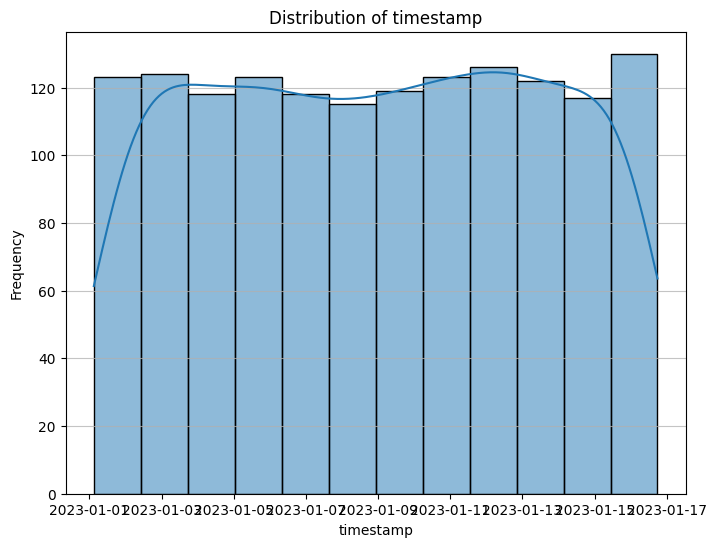

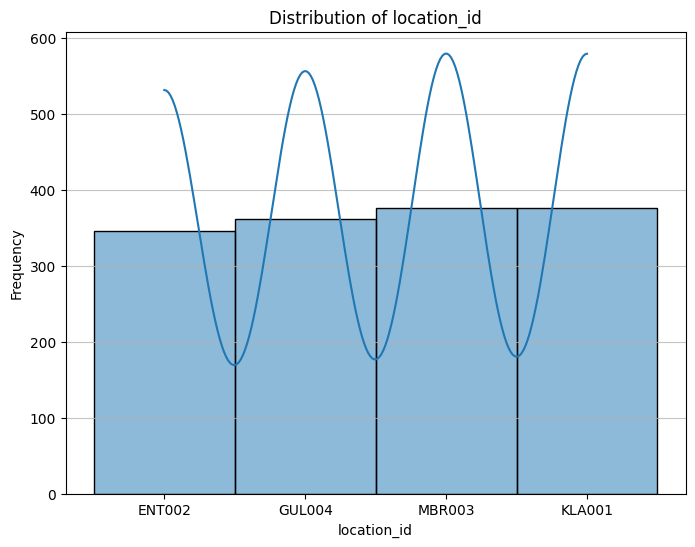

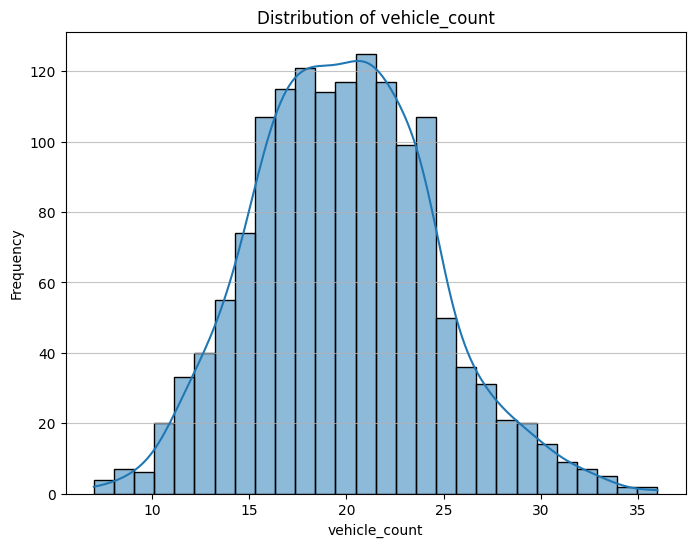

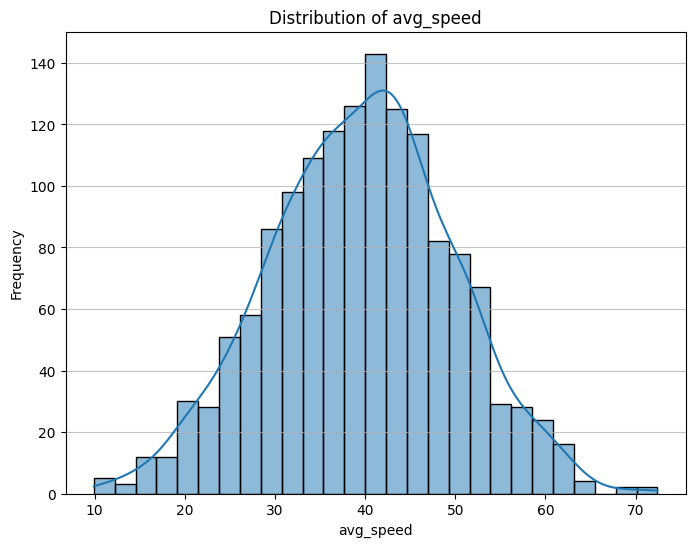

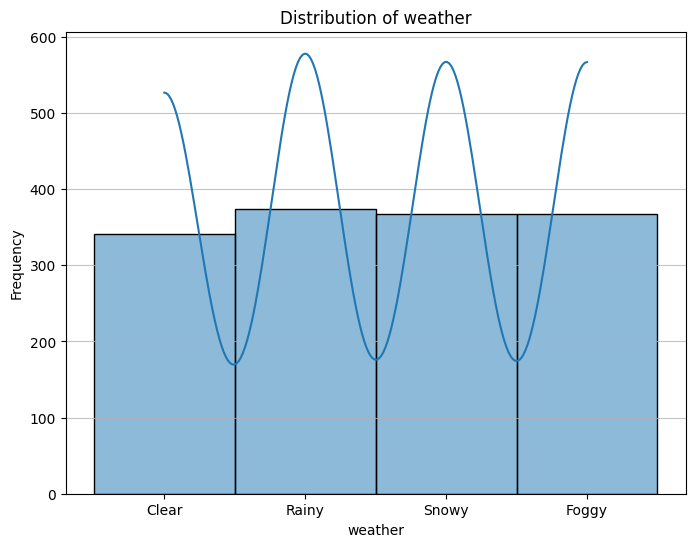

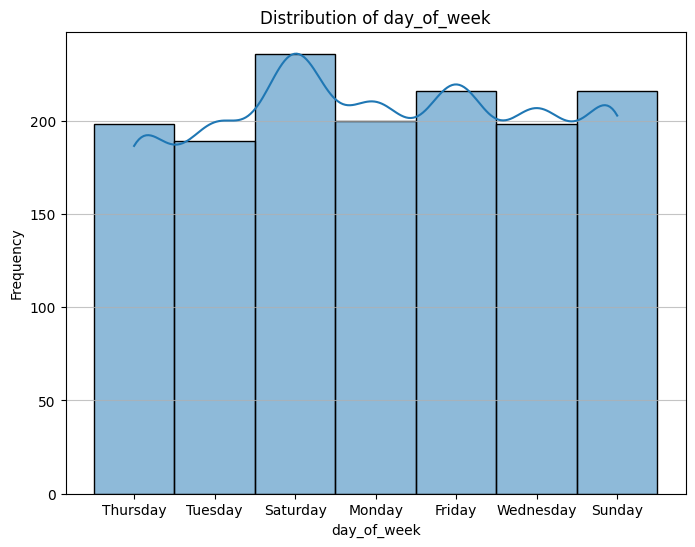

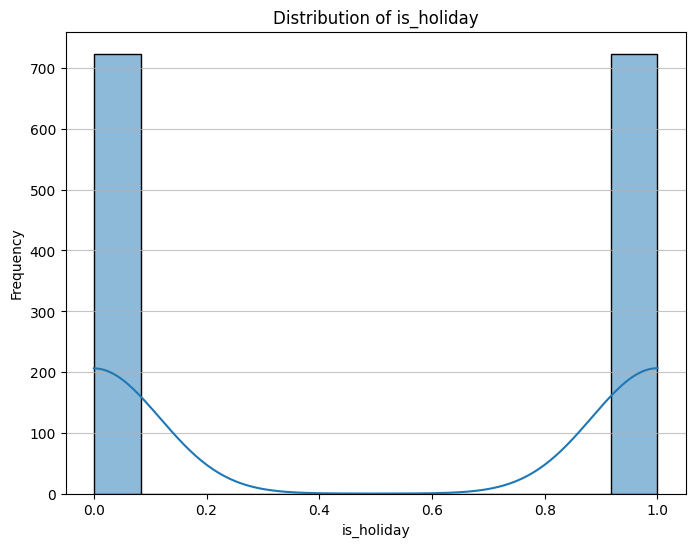

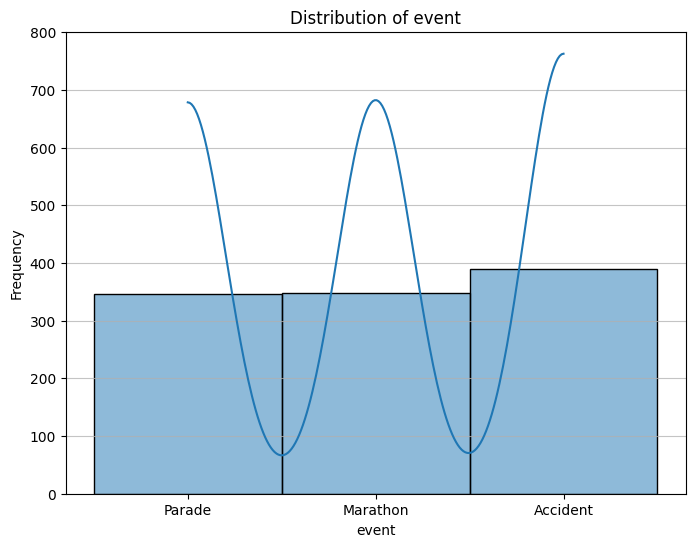

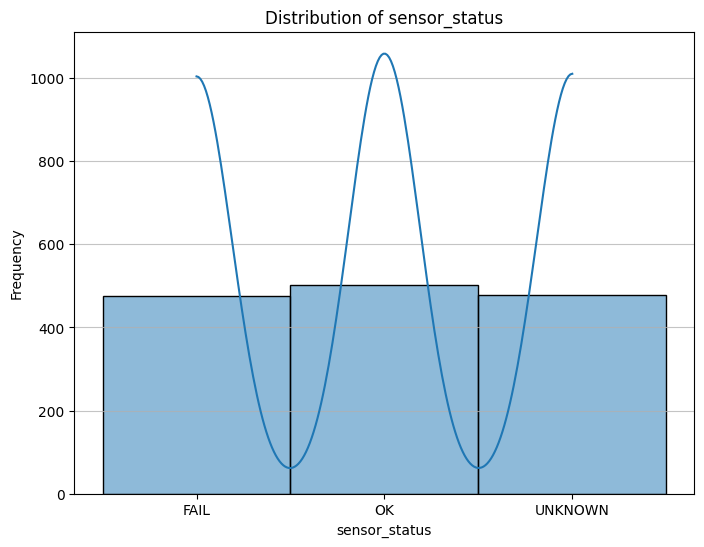

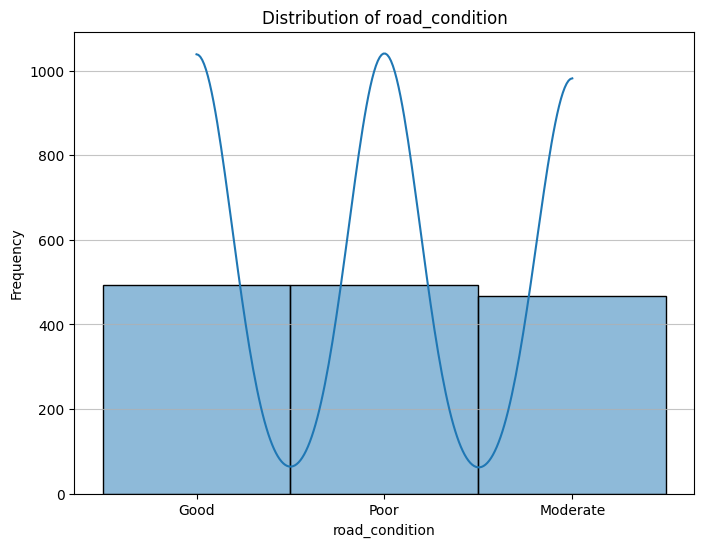

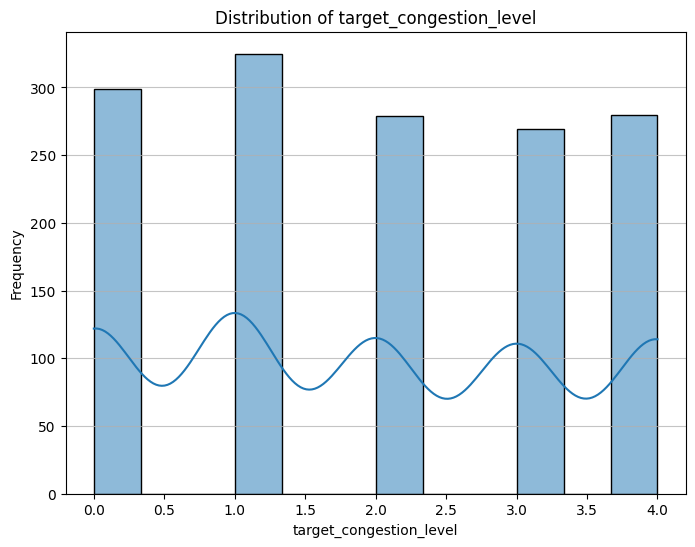

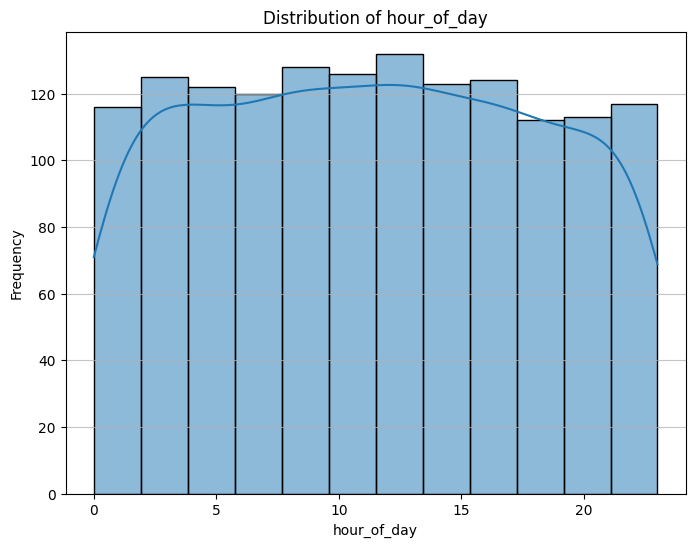

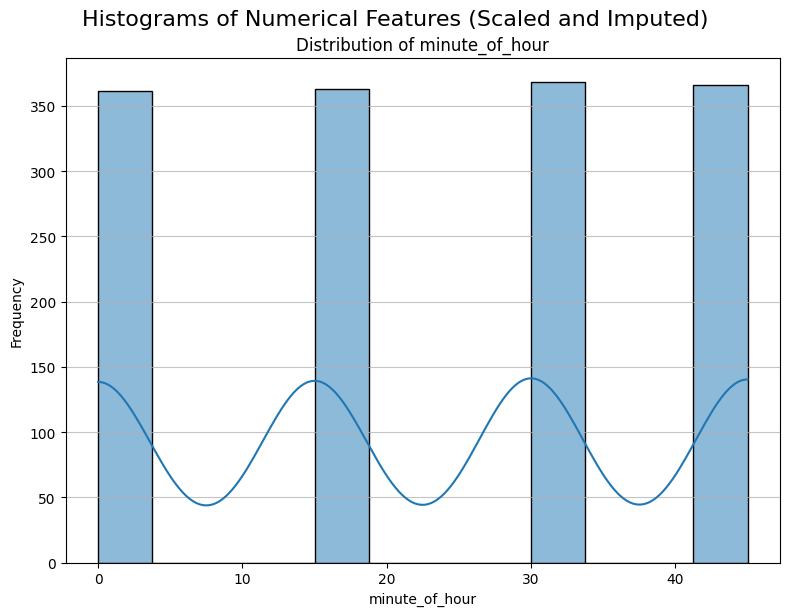

Histograms generated.



In [523]:

print("Generating Histograms for Numerical Features...")

# Identify actual numerical columns from the original list, as they are at the end of imputed_df_processed
# You might need to adjust 'numerical_cols' if your original list was not exactly what ended up in the final DF
# For example, if 'target_congestion_level' is your target, you might want to exclude it from feature plots.
# Let's assume the numerical_cols list from your previous code is accurate for this purpose.
# Ensure these columns exist in imputed_df_processed
numerical_cols_in_processed_df = [col for col in ['hour_of_day', 'minute_of_hour', 'target_congestion_level', 'vehicle_count', 'is_holiday', 'avg_speed'] if col in data.columns]

# Create subplots for better organization
n_numeric_features = len(data.columns)
# Determine grid size for subplots
cols_per_row = 3
rows_needed = (n_numeric_features + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 5, rows_needed * 4)) # Adjust figure size dynamically

for i, col in enumerate(data.columns):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout() # Adjusts subplot params for a tight layout
plt.suptitle('Histograms of Numerical Features (Scaled and Imputed)', y=1.02, fontsize=16) # Overall title
plt.show()
print("Histograms generated.\n")



In [524]:
df_cleaned.head(10)

,timestamp,hour_of_day,minute_of_hour,target_congestion_level,vehicle_count,is_holiday,avg_speed,location_id,sensor_status,event,day_of_week,weather,road_condition
0,2023-01-01 03:00:00,3.0,0.0,0.0,23.0,0.0,40.720369,ENT002,FAIL,Parade,Thursday,Clear,Good
1,2023-01-01 03:15:00,3.0,15.0,1.0,15.0,0.0,37.877910,GUL004,FAIL,Parade,Tuesday,Rainy,Poor
2,2023-01-01 03:30:00,3.0,30.0,2.0,21.0,1.0,30.480815,GUL004,OK,Marathon,Saturday,Clear,Moderate
3,2023-01-01 03:45:00,3.0,45.0,0.0,25.0,0.0,40.774805,MBR003,UNKNOWN,Accident,Monday,Rainy,Poor
4,2023-01-01 04:00:00,4.0,0.0,1.0,15.0,0.0,42.577525,GUL004,OK,Marathon,Friday,Snowy,Moderate
5,2023-01-01 04:30:00,4.0,30.0,3.0,19.0,0.0,43.341764,ENT002,UNKNOWN,Accident,Wednesday,Foggy,Good
6,2023-01-01 04:45:00,4.0,45.0,2.0,21.0,1.0,38.447410,MBR003,OK,Parade,Friday,Clear,Poor
7,2023-01-01 05:00:00,5.0,0.0,4.0,17.0,0.0,20.921924,KLA001,FAIL,Accident,Friday,Rainy,Moderate
8,2023-01-01 05:15:00,5.0,15.0,2.0,19.0,0.0,31.396150,ENT002,FAIL,Accident,Thursday,Foggy,Moderate
9,2023-01-01 05:30:00,5.0,30.0,4.0,16.0,1.0,35.863945,KLA001,FAIL,Accident,Saturday,Snowy,Good


Generating Scatter Plots for Key Numerical Feature Pairs...


<Figure size 1500x500 with 0 Axes>

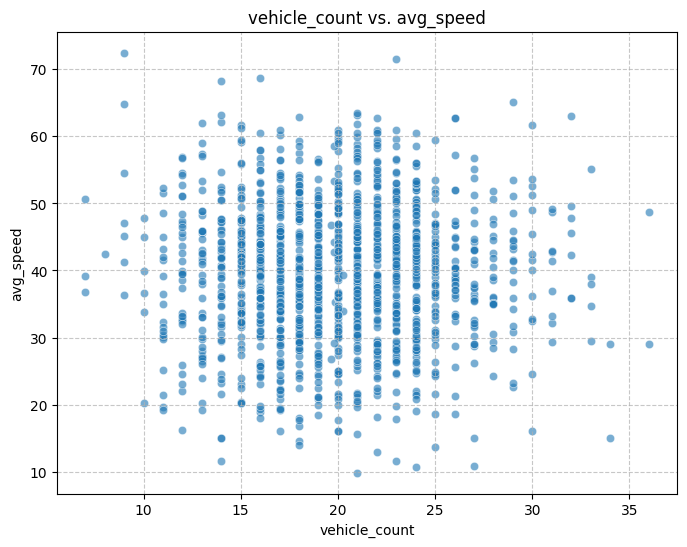

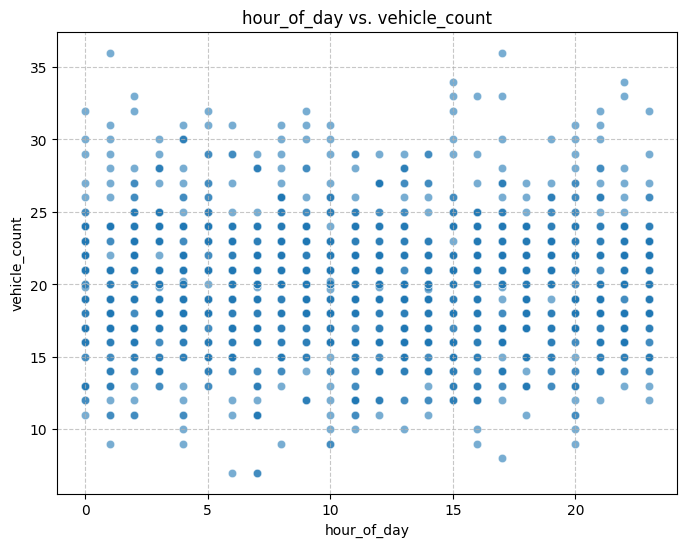

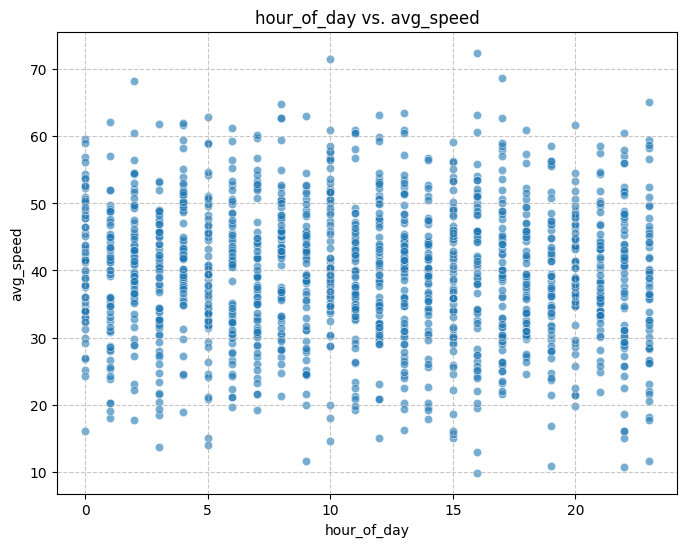

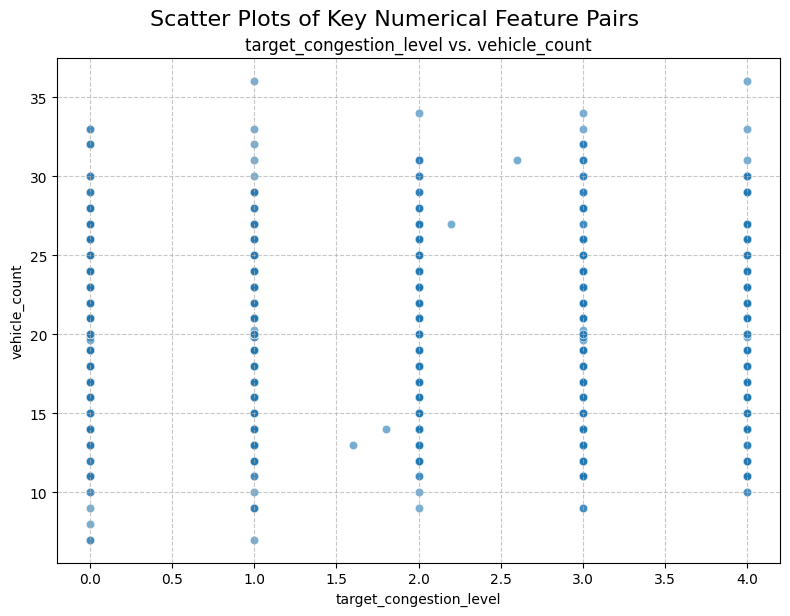

Scatter plots generated.



In [525]:
print("Generating Scatter Plots for Key Numerical Feature Pairs...")
scatter_pairs = [
    ('vehicle_count', 'avg_speed'),
    ('hour_of_day', 'vehicle_count'),
    ('hour_of_day', 'avg_speed'),  
    ('target_congestion_level', 'vehicle_count')
]

plt.figure(figsize=(15, 5)) 

for i, (x_col, y_col) in enumerate(scatter_pairs):
    if x_col in imputed_df_processed.columns and y_col in imputed_df_processed.columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=imputed_df_processed[x_col], y=imputed_df_processed[y_col], alpha=0.6)
        plt.title(f'{x_col} vs. {y_col}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.grid(True, linestyle='--', alpha=0.7)
    else:
        print(f"Warning: Columns '{x_col}' or '{y_col}' not found for scatter plot.")

plt.tight_layout()
plt.suptitle('Scatter Plots of Key Numerical Feature Pairs', y=1.02, fontsize=16)
plt.show()
print("Scatter plots generated.\n")





Generating Correlation Heatmap...


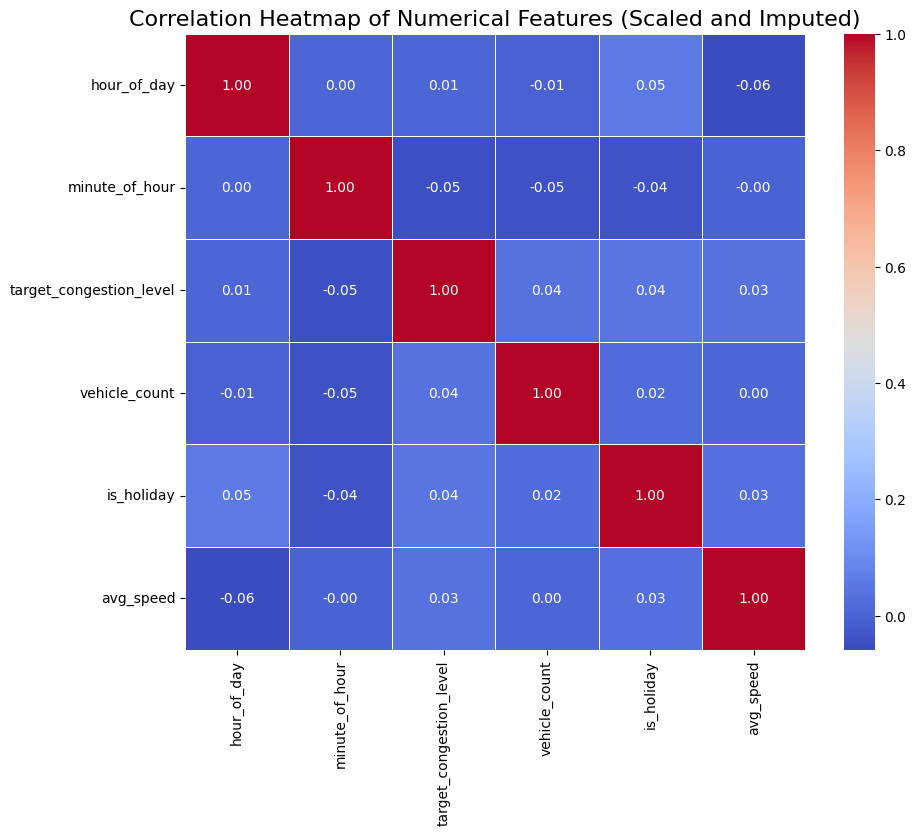

Correlation heatmap generated.



In [526]:
print("Generating Correlation Heatmap...")

# Calculate the correlation matrix for all numerical features
# It's usually best to correlate only numerical features for a clear heatmap.
# The one-hot encoded columns are binary and can be included, but might make the heatmap very large.
# Let's create a DataFrame with just the numerical features for a focused correlation heatmap.
numerical_df_for_corr = imputed_df_processed[numerical_cols_in_processed_df]

correlation_matrix = numerical_df_for_corr.corr()

plt.figure(figsize=(10, 8)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features (Scaled and Imputed)', fontsize=16)
plt.show()
print("Correlation heatmap generated.\n")



Generating Categorical Pair Visualizations...
Generating Event vs. day_of_week heatmap...
Generating Event vs. road_condition heatmap...
Generating Event vs. weather heatmap...


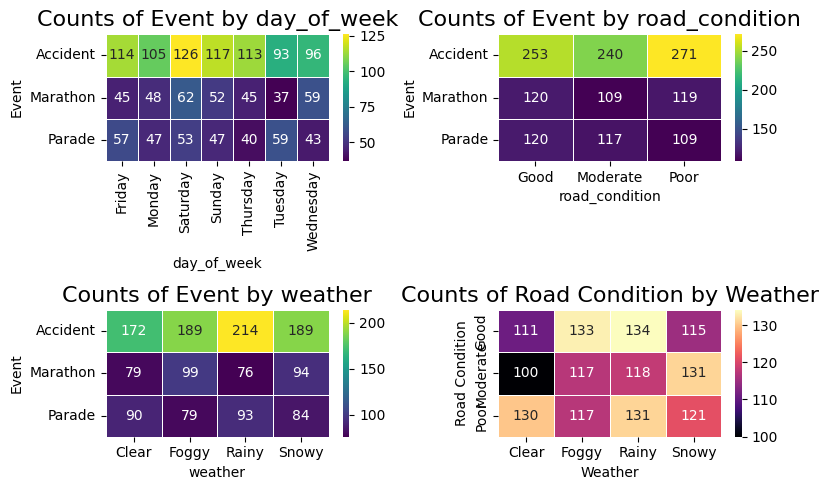

 heatmaps generated.

All  visualizations have been generated.


In [527]:

print("Generating Categorical Pair Visualizations...")
# Ensure inverse_transformed_categories_df is available and has the necessary columns
if 'event' in inverse_transformed_categories_df.columns and \
   'road_condition' in inverse_transformed_categories_df.columns and \
   'weather' in inverse_transformed_categories_df.columns:

    # Pair 1: Event vs. Road Condition
    plt.figure(figsize=(8,5))
    for i, col in enumerate(['day_of_week', 'road_condition', 'weather']):
        if col not in inverse_transformed_categories_df.columns:
            print(f"Warning: Column '{col}' not found in inverse_transformed_categories_df, skipping categorical pair visualizations.")
            continue
        print("Generating Event vs." ,col , "heatmap...")
        event_road_crosstab = pd.crosstab(inverse_transformed_categories_df['event'],
                                        inverse_transformed_categories_df[col])
        plt.subplot(2,2,i+1)  # Create a subplot for each heatmap
        sns.heatmap(event_road_crosstab, annot=True, cmap='viridis', fmt='d', linewidths=.5)
        plt.title(f"Counts of Event by {col}" ,fontsize=16)
        plt.xlabel(col)
        plt.ylabel('Event')
   
    # Pair 2: Road Condition vs. Weather
   
    road_weather_crosstab = pd.crosstab(inverse_transformed_categories_df['road_condition'],
                                        inverse_transformed_categories_df['weather'])
    plt.subplot(2,2,4)
    sns.heatmap(road_weather_crosstab, annot=True, cmap='magma', fmt='d', linewidths=.5)
    plt.title('Counts of Road Condition by Weather', fontsize=16)
    plt.xlabel('Weather')
    plt.ylabel('Road Condition')
    plt.tight_layout()
    plt.show()
    print(" heatmaps generated.\n")
else:
    print("Skipping categorical pair visualizations: Required columns  not found in inverse_transformed_categories_df.")

print("All  visualizations have been generated.")


Generating congestion level vs. day_of_week heatmap...
Generating congestion level vs. road_condition heatmap...
Generating congestion level vs. weather heatmap...
Generating congestion level vs. event heatmap...
Generating congestion level vs. location_id heatmap...


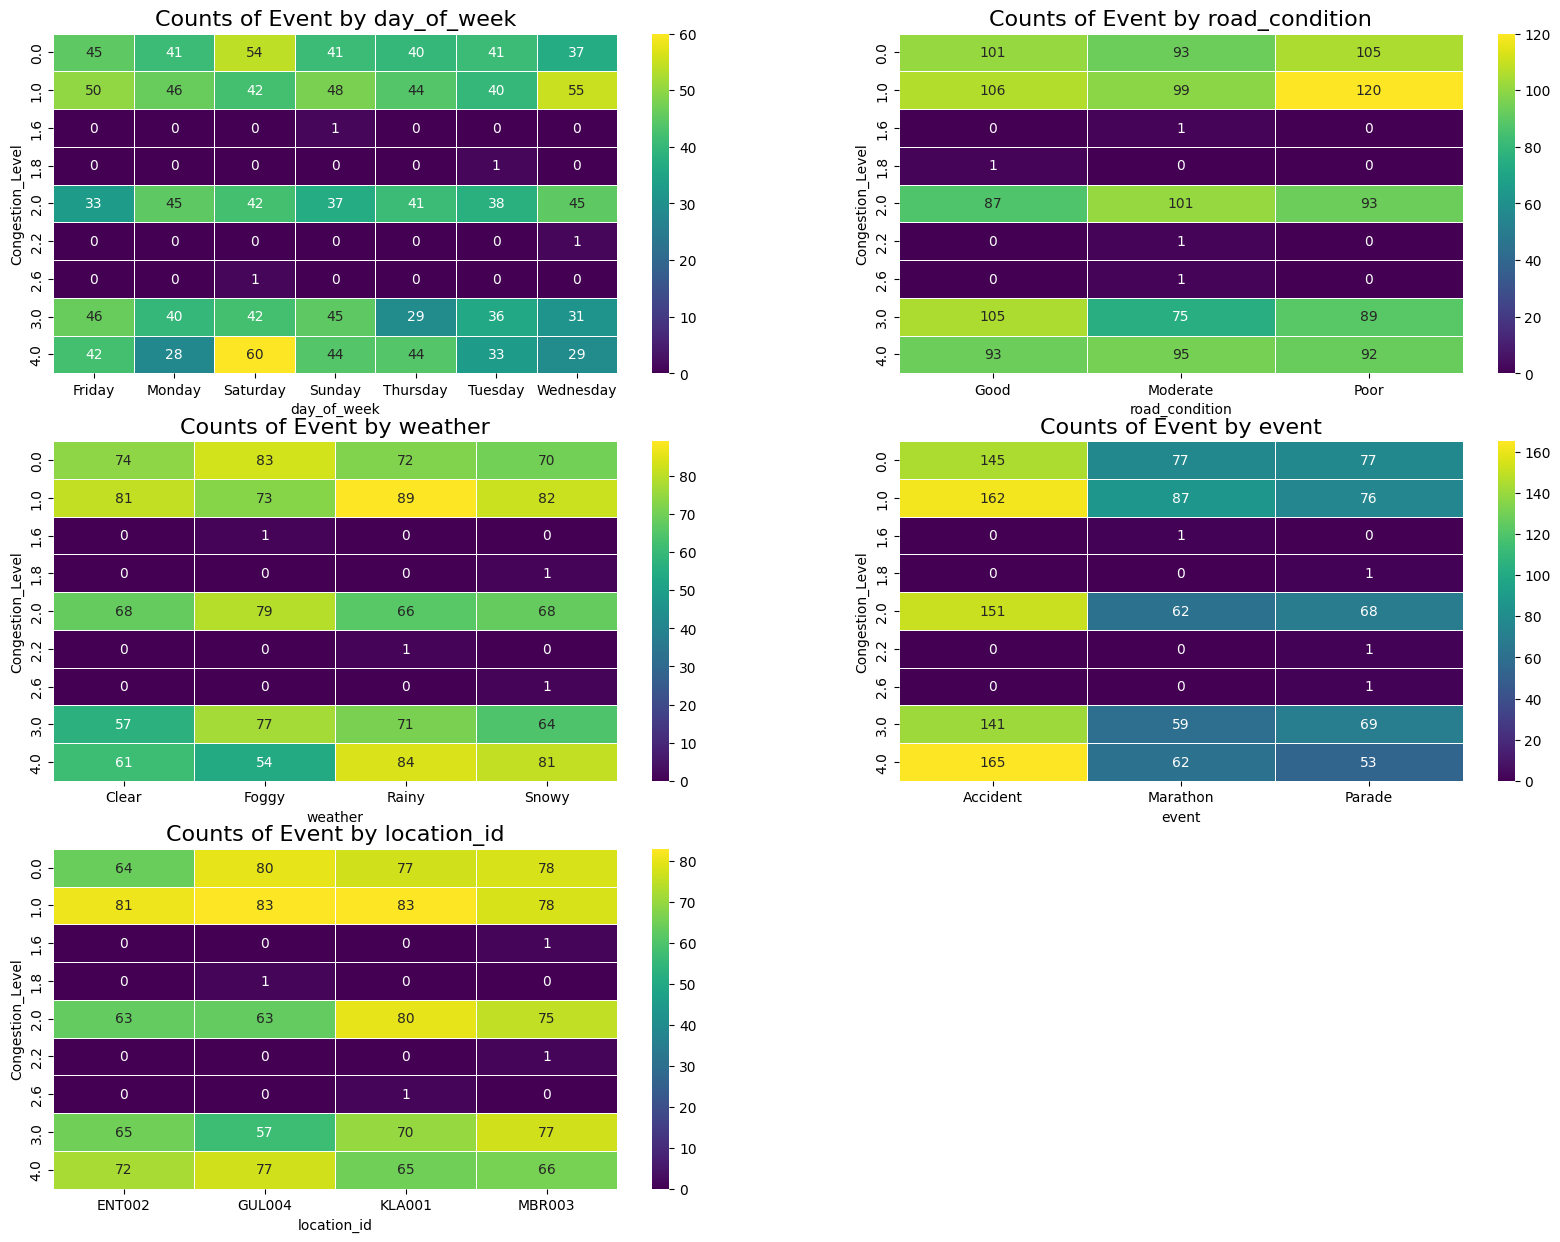

In [531]:
plt.figure(figsize=(20,15))
for i, col in enumerate(['day_of_week', 'road_condition', 'weather','event','location_id']):
    if col not in df_cleaned.columns:
        print(f"Warning: Column '{col}' not found in inverse_transformed_categories_df, skipping categorical pair visualizations.")
        continue
    print("Generating congestion level vs." ,col , "heatmap...")
    event_road_crosstab = pd.crosstab(df_cleaned['target_congestion_level'],
                                    df_cleaned[col])
    plt.subplot(3,2,i+1)  # Create a subplot for each heatmap
    sns.heatmap(event_road_crosstab, annot=True, cmap='viridis', fmt='d', linewidths=.5)
    plt.title(f"Counts of Event by {col}" ,fontsize=16)
    plt.xlabel(col)
    plt.ylabel('Congestion_Level')

Generating Events during Rainy Weather plot...


C:\Users\MAKOS\AppData\Local\Temp\ipykernel_6724\1055112490.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




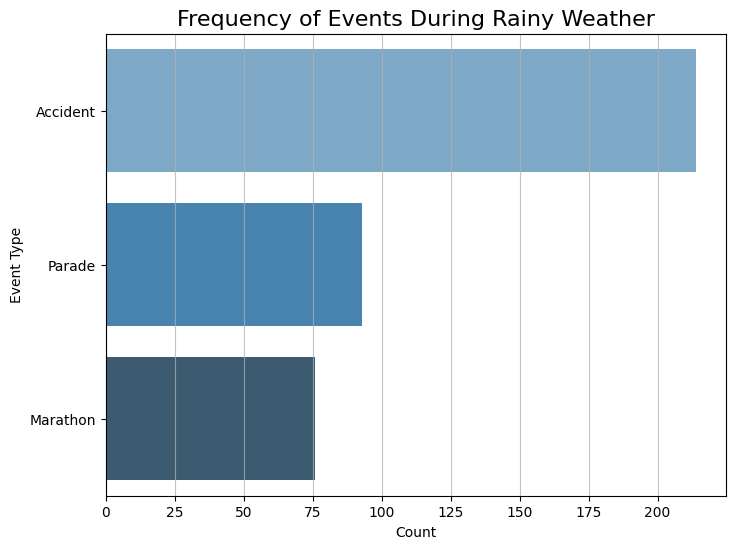

Events during Rainy Weather plot generated.



In [532]:
 # Visualization for "what events occur mostly when it's rainy"
    
print("Generating Events during Rainy Weather plot...")
rainy_events = inverse_transformed_categories_df[inverse_transformed_categories_df['weather'] == 'Rainy']
if not rainy_events.empty:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=rainy_events, y='event', order=rainy_events['event'].value_counts().index, palette='Blues_d')
    plt.title('Frequency of Events During Rainy Weather', fontsize=16)
    plt.xlabel('Count')
    plt.ylabel('Event Type')
    plt.grid(axis='x', alpha=0.75)
    plt.show()
    print("Events during Rainy Weather plot generated.\n")
else:
    print("No 'Rainy' weather events found in the data to plot.")